# Exploratory Data Analysis

#### 1.Importing the dataset and Generating summary

In [136]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [137]:
#reading the dataset
df=pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [138]:
#Generating summary statistics
print(df.describe())


       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


#### 2.Creating histograms and Boxplots for numeric features

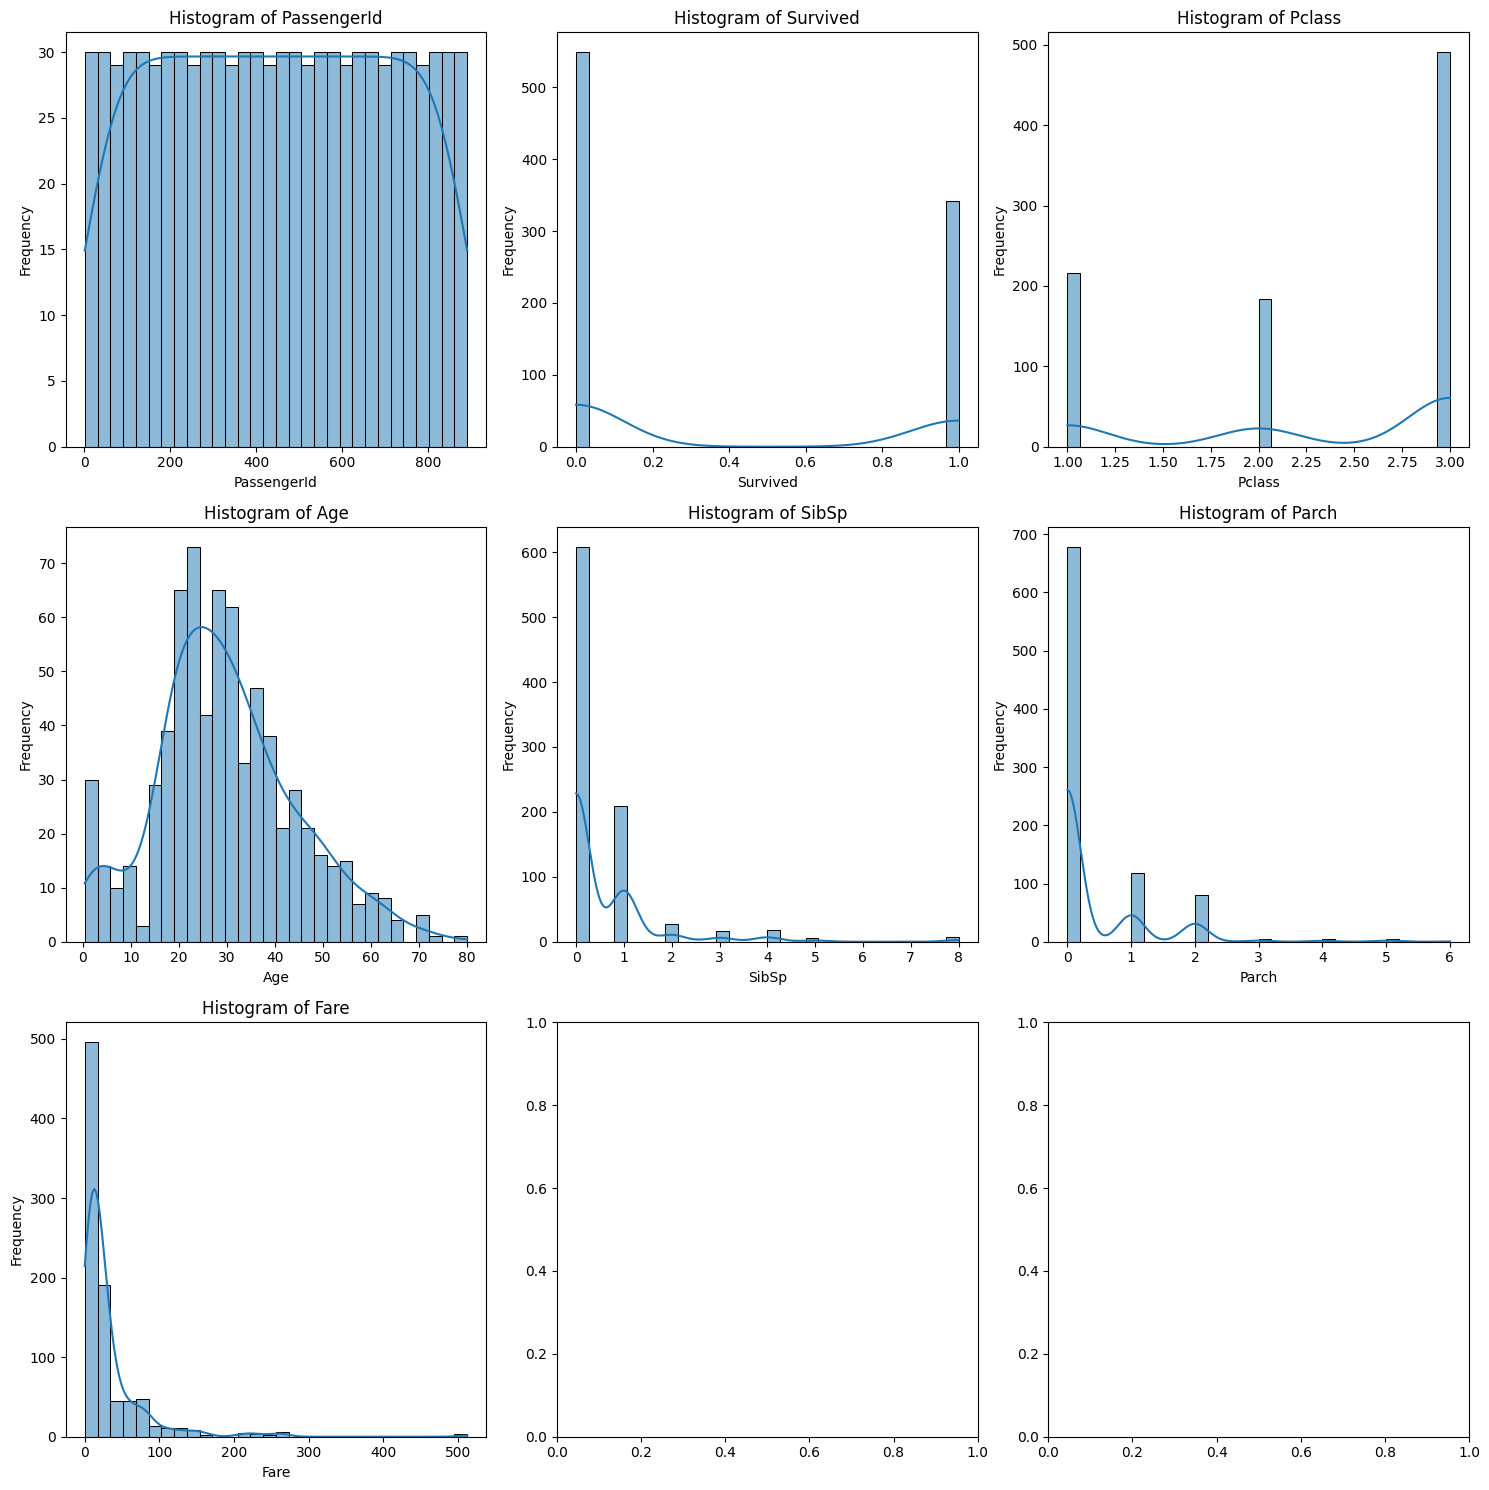

In [139]:
#creating histograms for numerical features 
numerical_features=df.select_dtypes(include=['Float64','int64']).columns
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
for i, feature in enumerate(numerical_features):
    sns.histplot(df[feature], kde=True, bins=30, ax=axs[i//3, i%3])
    axs[i//3, i%3].set_title(f'Histogram of {feature}')
    axs[i//3, i%3].set_xlabel(feature)
    axs[i//3, i%3].set_ylabel('Frequency')
plt.tight_layout()
plt.show()


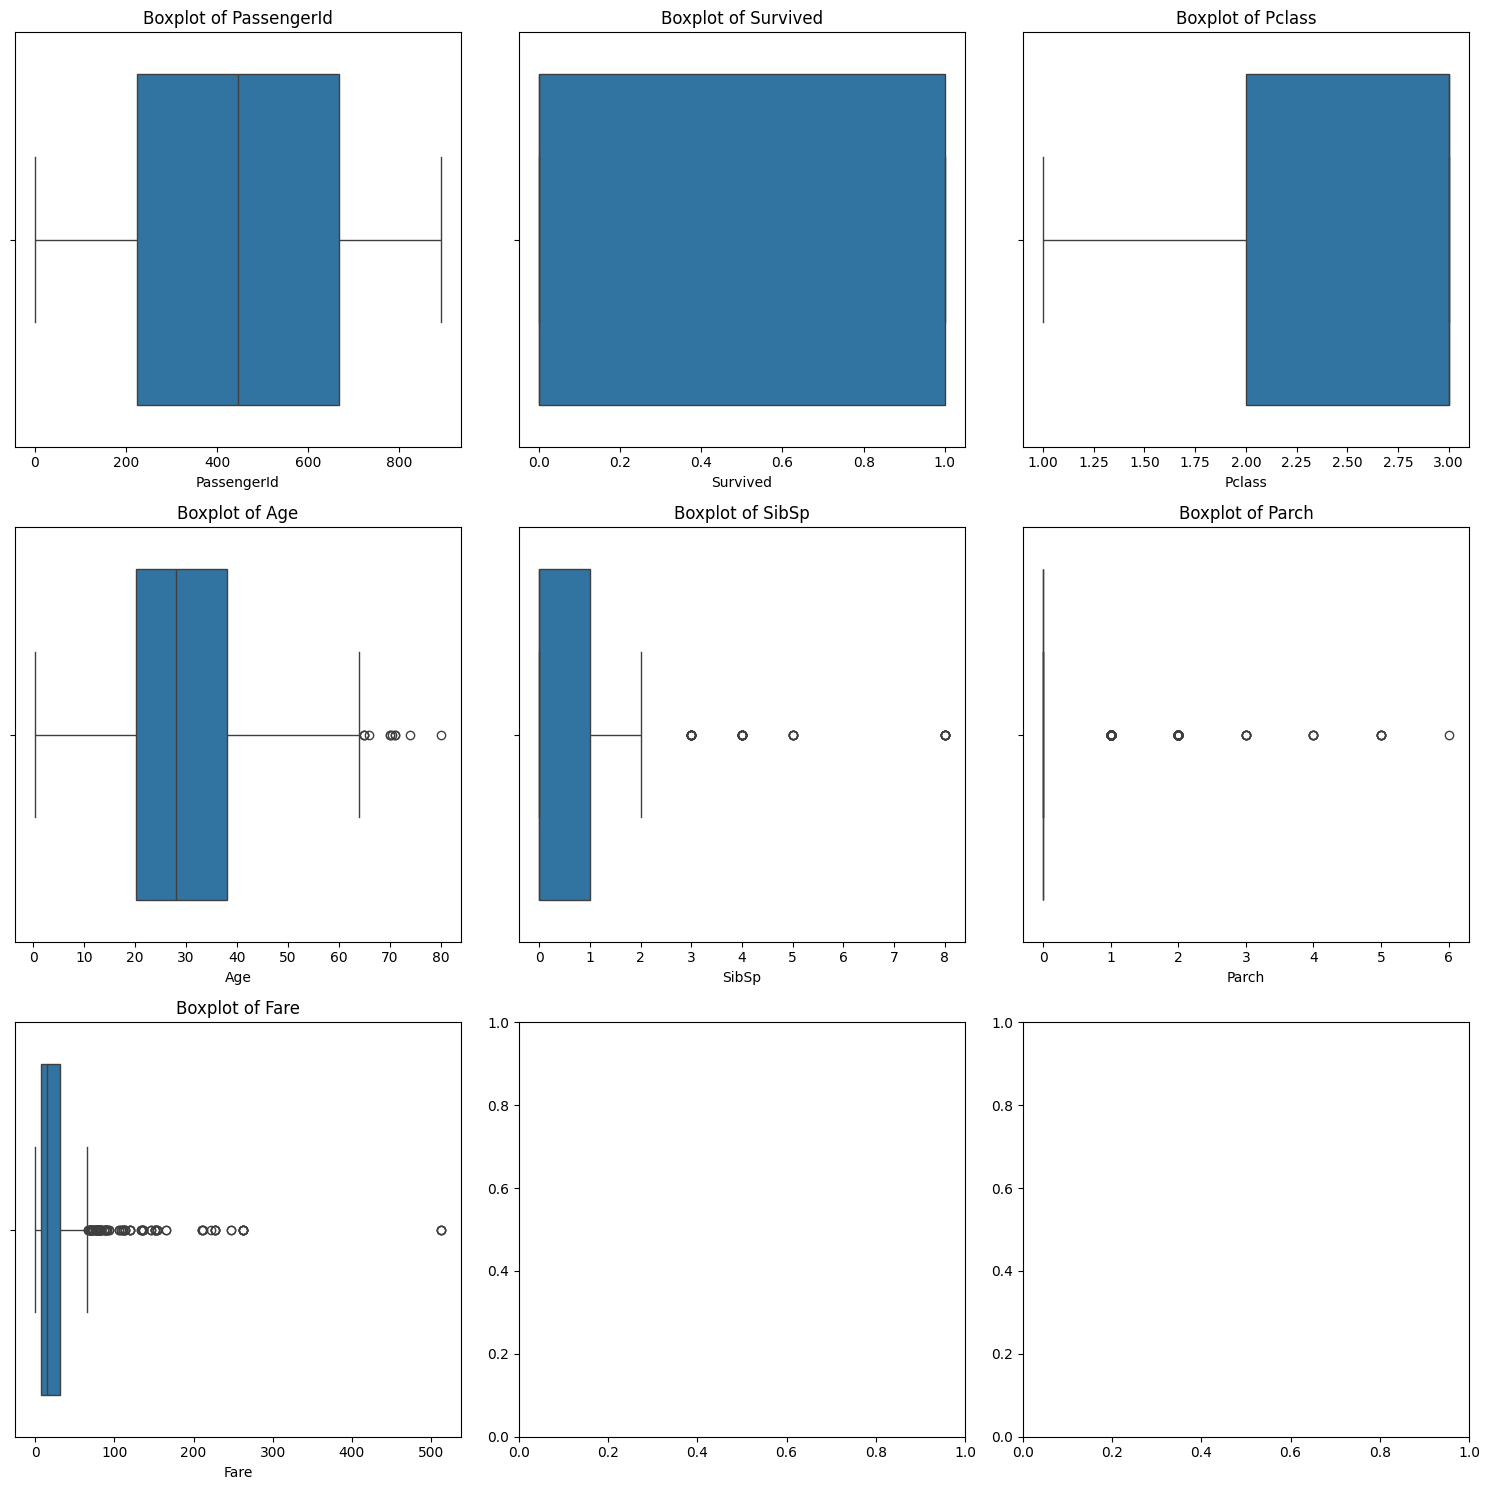

In [140]:
#boxplots for numerical features
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 15)) 
for i,feature in enumerate(numerical_features):
    sns.boxplot(x=df[feature], ax=axs[i//3, i%3])
    axs[i//3, i%3].set_title(f'Boxplot of {feature}')
    axs[i//3, i%3].set_xlabel(feature)
plt.tight_layout()
plt.show()

#### 3.Displaying Feature Relationships

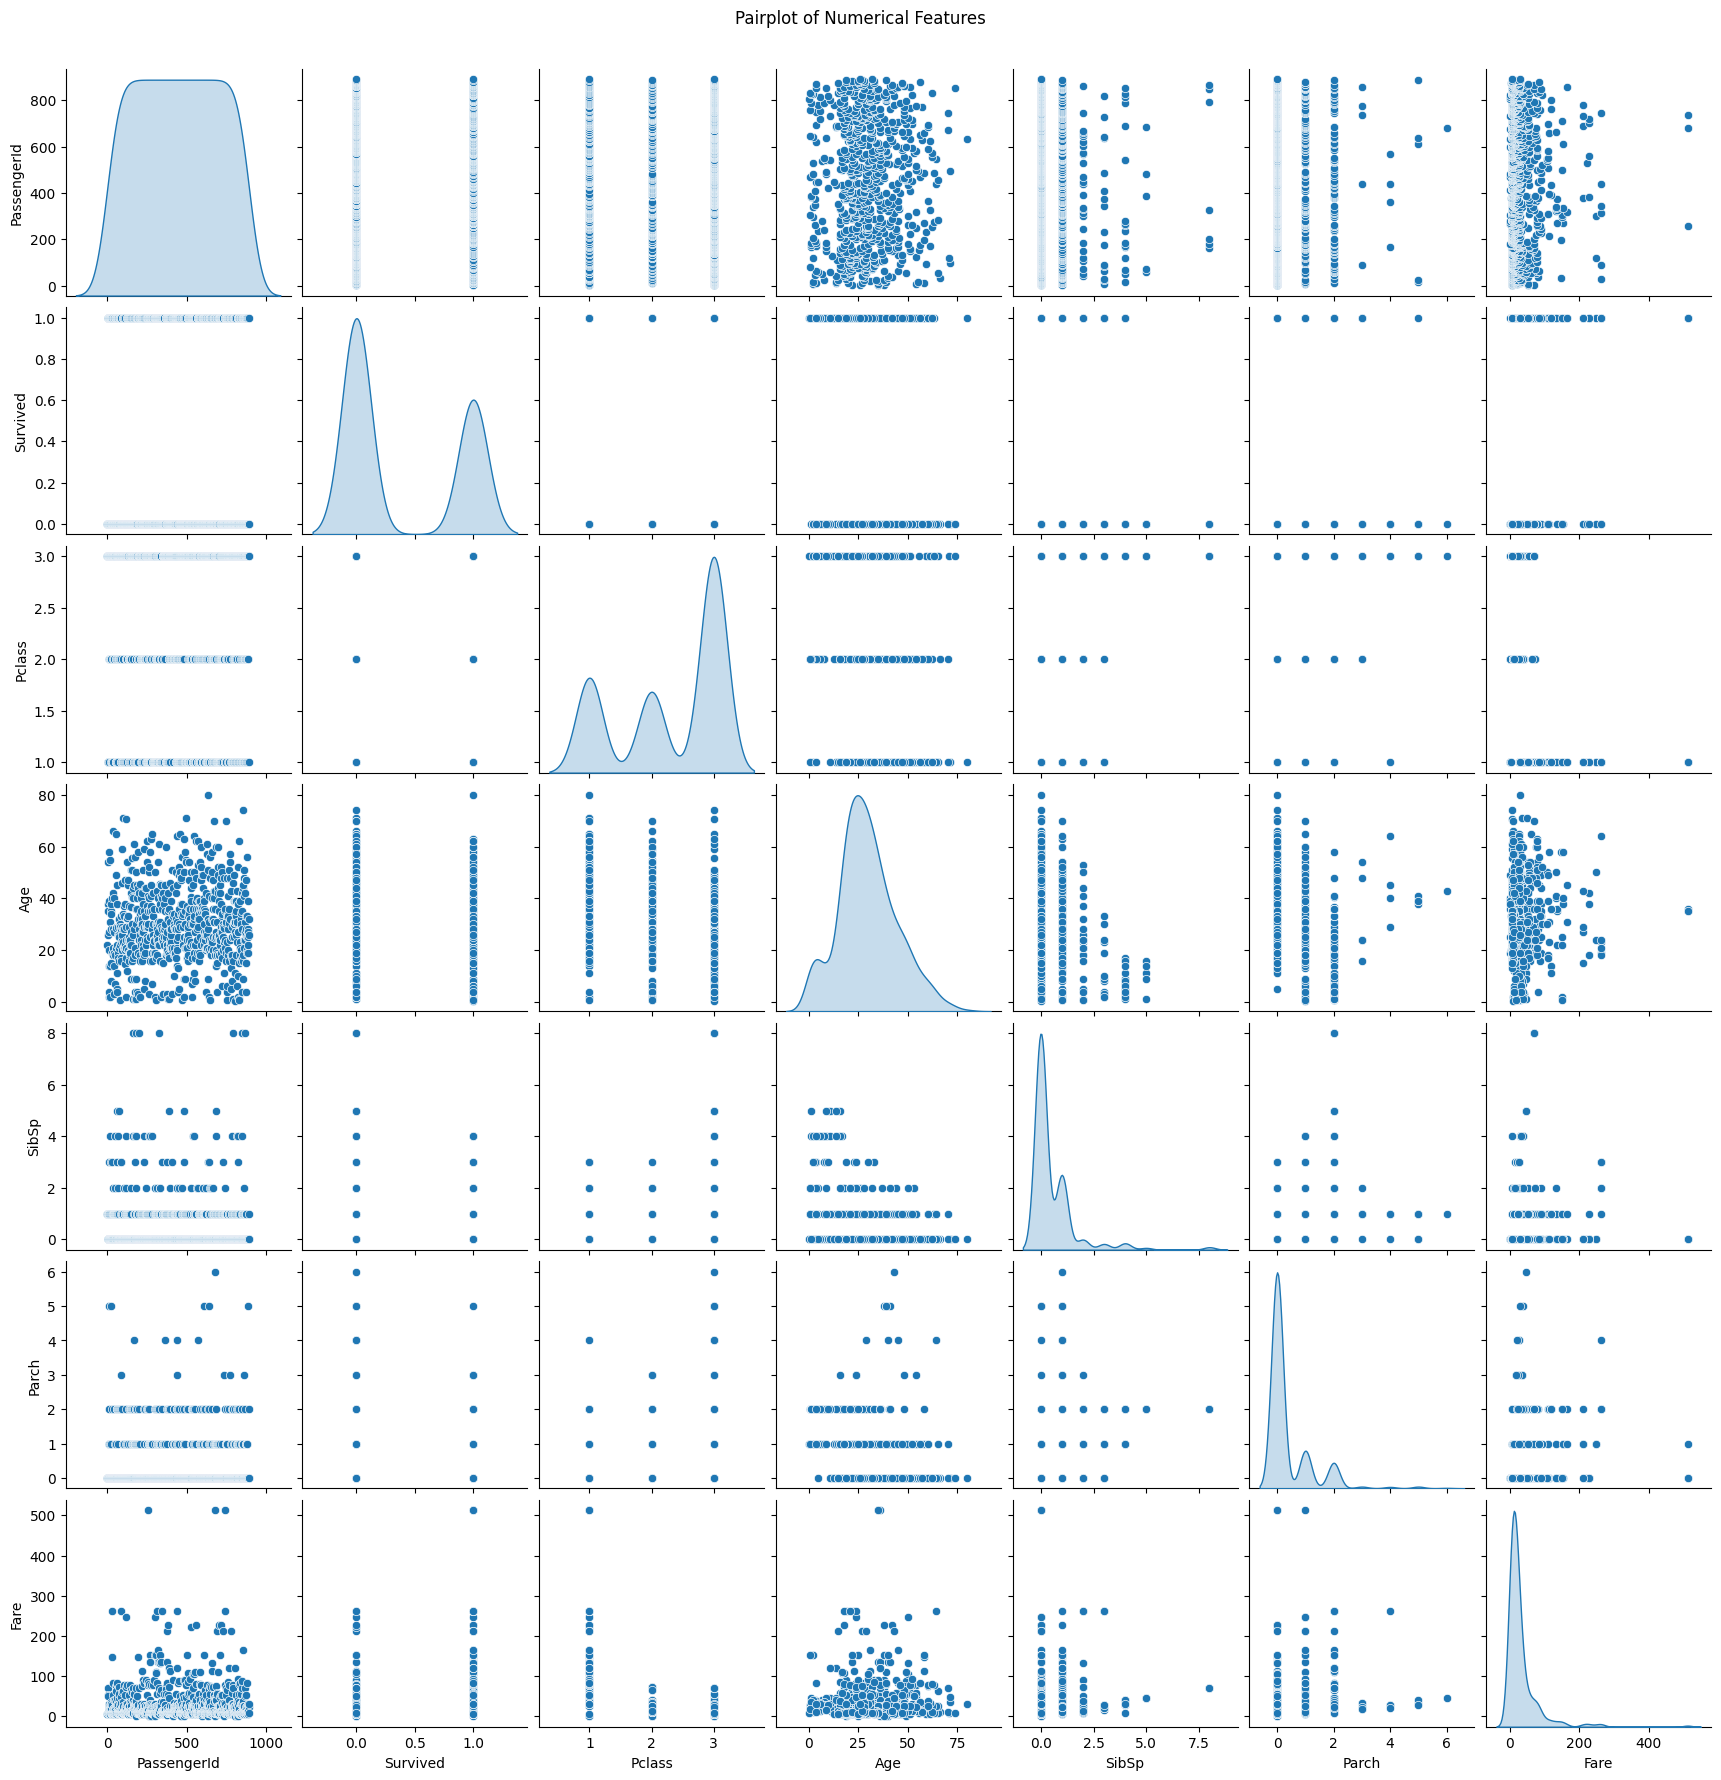

In [141]:
#displaying feature relationships using pairplot
sns.pairplot(df[numerical_features], diag_kind='kde')
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()



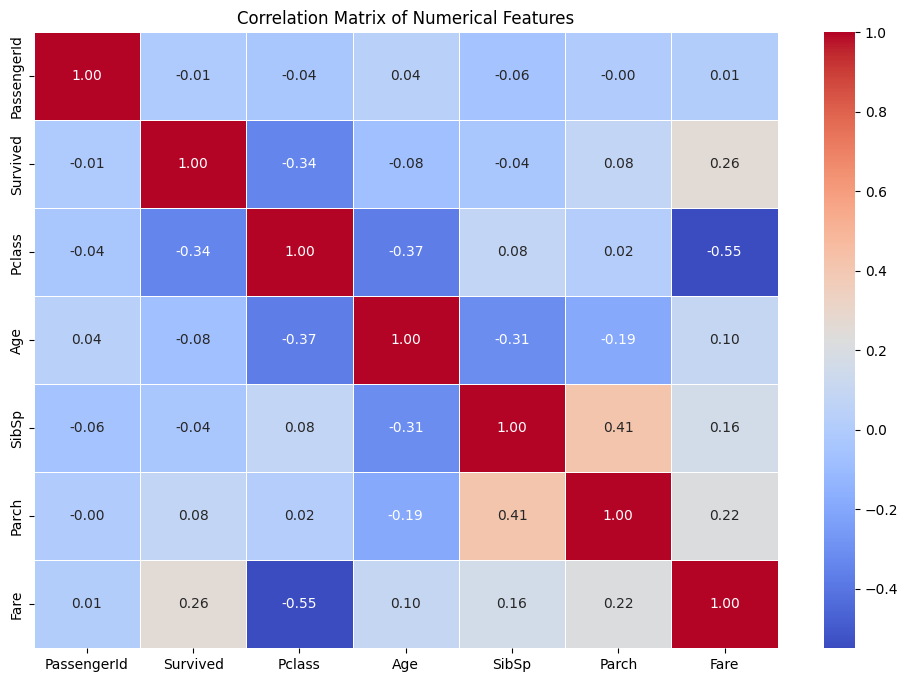

In [142]:
#displaying the feature relationships using correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


#### 4.Idenfying patterns,trends and anomolies in data

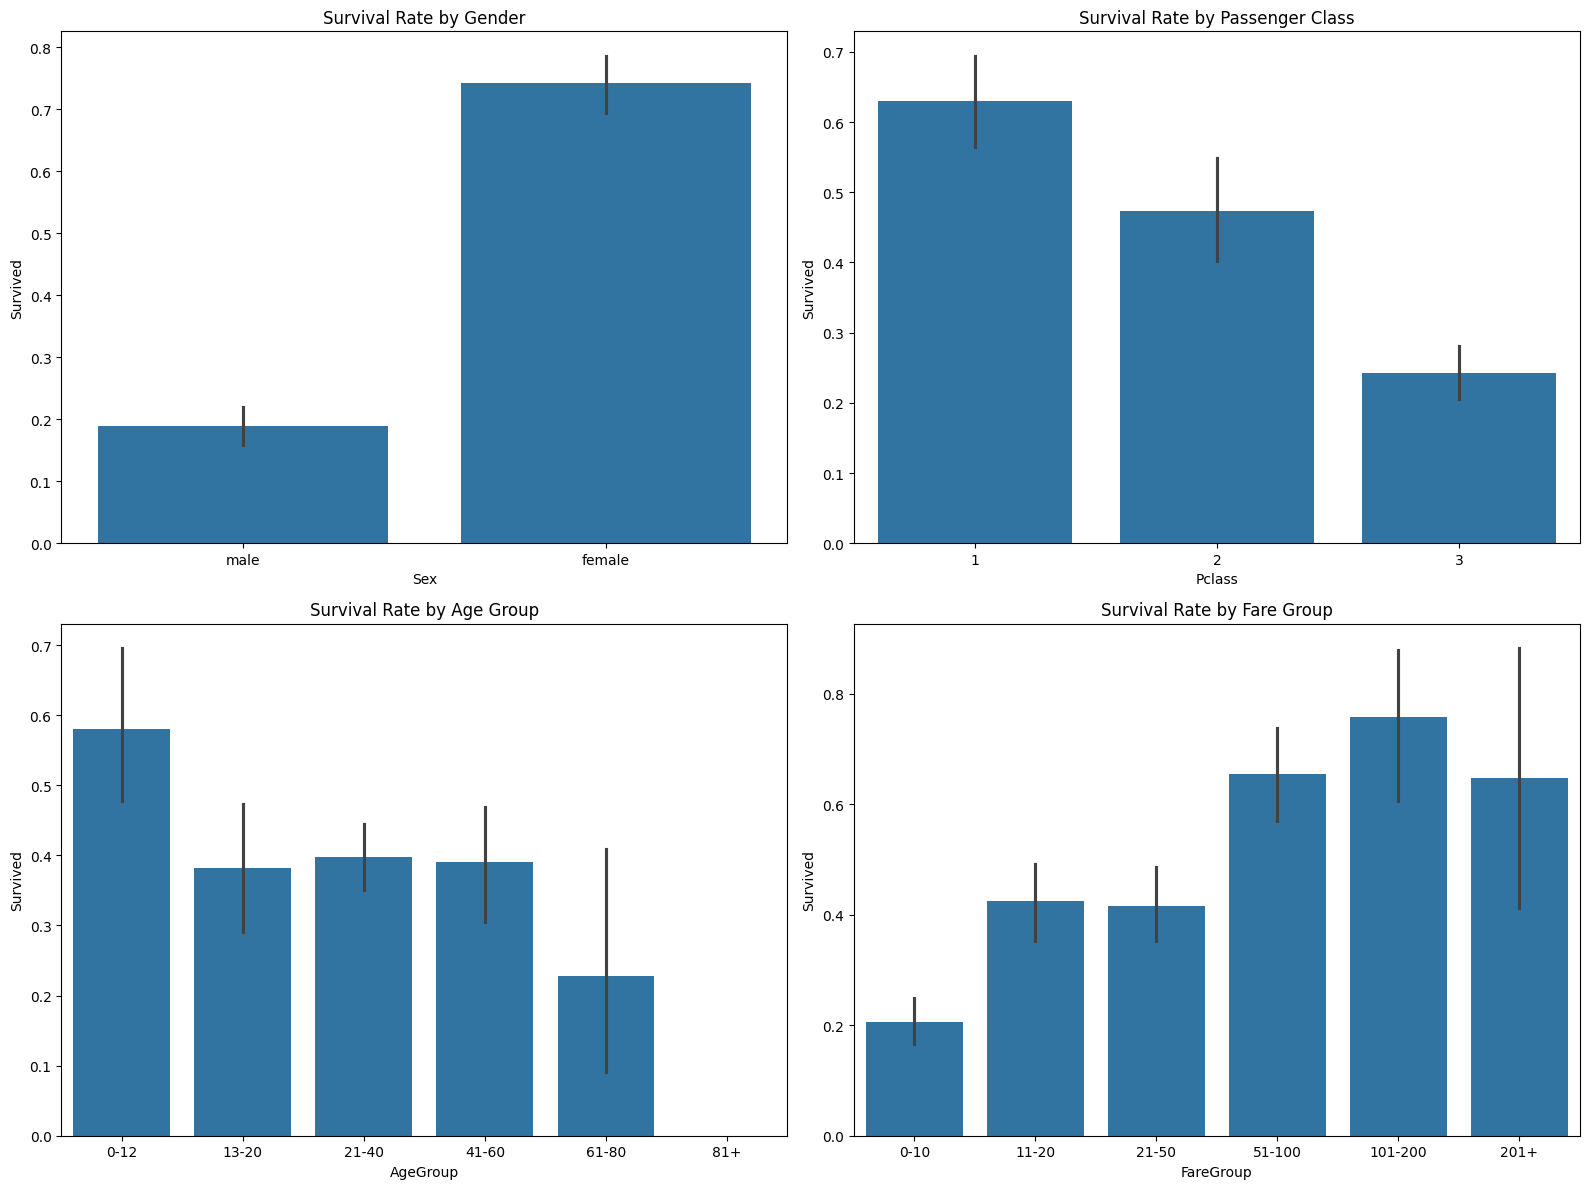

In [143]:
#identifying the patterns in the data 
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 20, 40, 60, 80, 100], labels=['0-12', '13-20', '21-40', '41-60', '61-80', '81+'])
df['FareGroup'] = pd.cut(df['Fare'], bins=[0, 10, 20, 50, 100, 200, 500], labels=['0-10', '11-20', '21-50', '51-100', '101-200', '201+'])

# Survival rate by sex
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# Survival rate by gender
sns.barplot(x='Sex', y='Survived', data=df, ax=axs[0, 0])
axs[0, 0].set_title('Survival Rate by Gender')

# Survival rate by passenger class
sns.barplot(x='Pclass', y='Survived', data=df, ax=axs[0, 1])
axs[0, 1].set_title('Survival Rate by Passenger Class')

# Survival rate by age group
sns.barplot(x='AgeGroup', y='Survived', data=df, ax=axs[1, 0])
axs[1, 0].set_title('Survival Rate by Age Group')

# Survival rate by fare group
sns.barplot(x='FareGroup', y='Survived', data=df, ax=axs[1, 1])
axs[1, 1].set_title('Survival Rate by Fare Group')

plt.tight_layout()
plt.show()



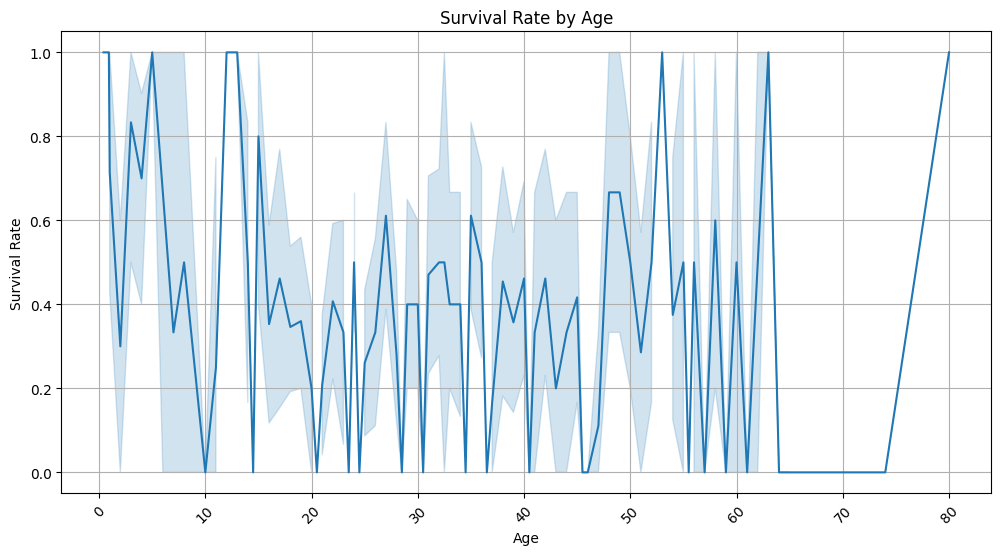

In [144]:
#identifying the trends in the data

plt.figure(figsize=(12, 6))
sns.lineplot(x='Age', y='Survived', data=df)
plt.title('Survival Rate by Age')
plt.xlabel('Age')
plt.ylabel('Survival Rate') 
plt.xticks(rotation=45)
plt.grid()
plt.show()

#### 5. Making basic feature level infernces from the visuals

C:\Users\nagen\AppData\Local\Temp\ipykernel_11216\2561461929.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=df,palette='viridis')


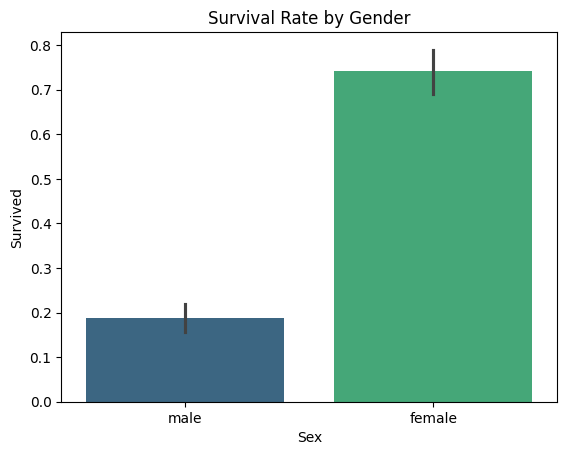

Inference:Women survived at a much higher rate than men (75% vs ~20%)


In [145]:
# Bar plot: Survival rate by gender
sns.barplot(x='Sex', y='Survived', data=df,palette='viridis')
plt.title("Survival Rate by Gender")
plt.show()
print("Inference:Women survived at a much higher rate than men (75% vs ~20%)")

C:\Users\nagen\AppData\Local\Temp\ipykernel_11216\464142069.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=df,palette='Set2')


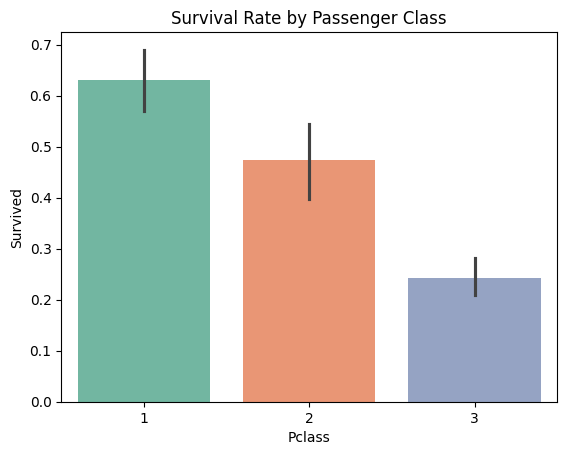

Inference:Higher-class passengers (1st class) had better survival odds (63% vs 47% in 2nd vs 24% in 3rd).


In [146]:
# Bar plot: Survival rate by class
sns.barplot(x='Pclass', y='Survived', data=df,palette='Set2')
plt.title("Survival Rate by Passenger Class")
plt.show()
print("Inference:Higher-class passengers (1st class) had better survival odds (63% vs 47% in 2nd vs 24% in 3rd).")

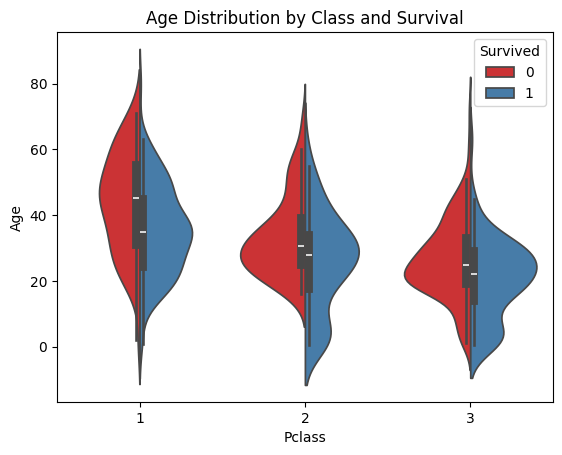

Inference: Children in 3rd class had lower survival rates compared to 1st/2nd class.


In [147]:
# Violin plot: Age distribution by class and survival
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=df, split=True, palette='Set1')
plt.title("Age Distribution by Class and Survival")
plt.show()
print("Inference: Children in 3rd class had lower survival rates compared to 1st/2nd class.")

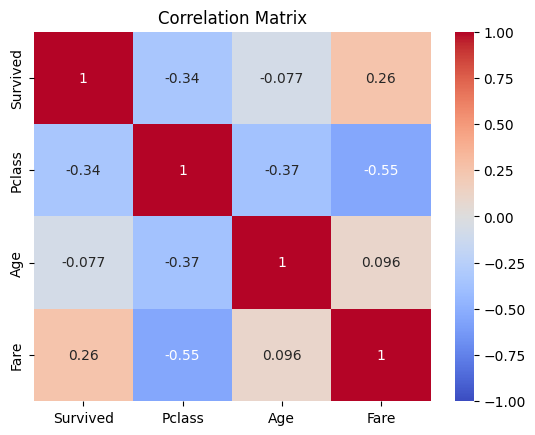

Inference:
Strongest positive correlation: fare and survived (higher fare = higher survival).
Strongest negative correlation: pclass and survived (lower class = lower survival).


In [148]:
# Compute correlations
corr = df[['Survived', 'Pclass', 'Age', 'Fare']].corr()

# Heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()
print("Inference:\nStrongest positive correlation: fare and survived (higher fare = higher survival).\nStrongest negative correlation: pclass and survived (lower class = lower survival).")